In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
sys.path.insert(0, "../../")

import torch
import torch.nn as nn
from src.data import make_dataset
from src.models import train_model
from src.models import imagemodels
import gin



In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cpu device


In [3]:
gin.parse_config_file("model.gin")
train_dataloader, test_dataloader = make_dataset.get_MNIST()


In [4]:
print(gin.operative_config_str())


import gin.torch.external_configurables

# Parameters for get_MNIST:
# ==============================================================================
get_MNIST.batch_size = 32
get_MNIST.data_dir = '../../data/raw'



In [6]:
# Show dimension of images
x, y = next(iter(train_dataloader))
x.shape, y.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

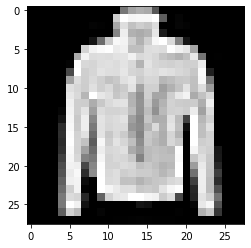

In [7]:
# Show image
import matplotlib.pyplot as plt
plt.imshow(x[0].squeeze(), cmap="gray")


In [8]:
conv1 = nn.Conv2d(
    in_channels=1,
    out_channels=6,
    kernel_size=3,
    padding=(1, 1))
out1 = conv1(x)

conv2 = nn.Conv2d(
    in_channels=out1.shape[1],
    out_channels=12,
    kernel_size=3,
    padding=(1, 1))
out2 = conv2(out1)

conv3 = nn.Conv2d(
    in_channels=out2.shape[1],
    out_channels=24,
    kernel_size=3,
    padding=(0, 0))
out3 = conv3(out2)

conv4 = nn.Conv2d(
    in_channels=out3.shape[1],
    out_channels=12,
    kernel_size=3,
    stride=1,
    padding=(0, 0))
out4 = conv4(out3)

x.shape, out1.shape, out2.shape, out3.shape, out4.shape


(torch.Size([32, 1, 28, 28]),
 torch.Size([32, 6, 28, 28]),
 torch.Size([32, 12, 28, 28]),
 torch.Size([32, 24, 26, 26]),
 torch.Size([32, 12, 24, 24]))

In [ ]:
!pwd


In [9]:
model = imagemodels.CNNNet().to(device)
print(model)


CNNNet(
  (layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [ ]:
#import torch.optim as optim
#optimizer = optim.Adam
#loss_fn = torch.nn.CrossEntropyLoss()


In [11]:
model = train_model.trainloop(
    epochs=2,
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    eval_steps=100,
)



2022-05-13 21:05:17.993 | INFO     | src.data.data_tools:clean_dir:164 - Clean out ../../models/adam
2022-05-13 21:05:55.913 | INFO     | src.models.train_model:trainloop:75 - Epoch 0 train 0.0200
2022-05-13 21:06:33.244 | INFO     | src.models.train_model:trainloop:75 - Epoch 1 train 0.0126
